# Analysis of Complex Networks 
## Assignment 6 (Group 6)
### Student: André Dussing  ID: 018113442F 

Github: https://github.com/andreunilux/Complex-Networks check for change

In [2]:
# import necessary libraries
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random


At first we set the path according to our dataset we are using (here Group6)


1. Facebook-Ego 
2. Twitter-Ego

In [3]:
path = "exercise_complex_network/Datasets/Group6"
path_facebook = os.path.join(path,"Facebook-Ego", "1684.edges" ) # 1. Facebook-Ego
path_twitter =  os.path.join(path,"Twitter-Ego", "2029971.edges" ) # 2. Twitter-Ego
# Now we read the edge list from the file and create the graph with NetworkX


facebook_graph = nx.read_edgelist(path_facebook, nodetype=int) # Undirected
twitter_graph = nx.read_edgelist(path_twitter, nodetype=int, create_using=nx.DiGraph()) #Directed




### (a) Please randomly choose two sets of nodes in Facebook-Ego dataset (each consists of 50 nodes without repetition), and calculate the cut size and conductance between the two sets of nodes.Please also plot the partitioning.

Cut Size: 132
Conductance: 0.353887399463807


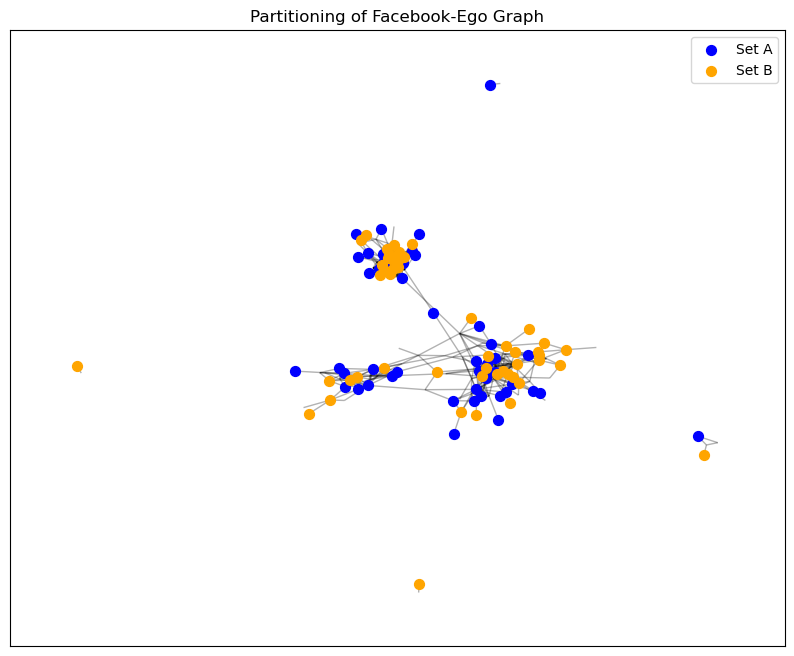

In [4]:
def calculate_cut_conductance(graph, set_a, set_b):
    cut_size = nx.cut_size(graph, set_a, set_b)
    conductance = nx.algorithms.cuts.conductance(graph, set_a, set_b)
    return cut_size, conductance

# Randomly select two sets of 50 nodes
all_nodes = list(facebook_graph.nodes())
set_a = set(random.sample(all_nodes, 50))
set_b = set(random.sample([node for node in all_nodes if node not in set_a], 50))

# Calculate cut size and conductance
cut_size, conductance = calculate_cut_conductance(facebook_graph, set_a, set_b)
print(f"Cut Size: {cut_size}")
print(f"Conductance: {conductance}")

# Plotting the partition
pos = nx.spring_layout(facebook_graph)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(facebook_graph, pos, nodelist=set_a, node_color='blue', label="Set A", node_size=50)
nx.draw_networkx_nodes(facebook_graph, pos, nodelist=set_b, node_color='orange', label="Set B", node_size=50)
nx.draw_networkx_edges(facebook_graph, pos, alpha=0.3)
plt.legend()
plt.title("Partitioning of Facebook-Ego Graph")
plt.show()



### (b) please repeat the process mentioned in (a) again but with different sets of nodes. What differences have you observed? What cause the differences?

Second Cut Size: 150
Second Conductance: 0.4143646408839779


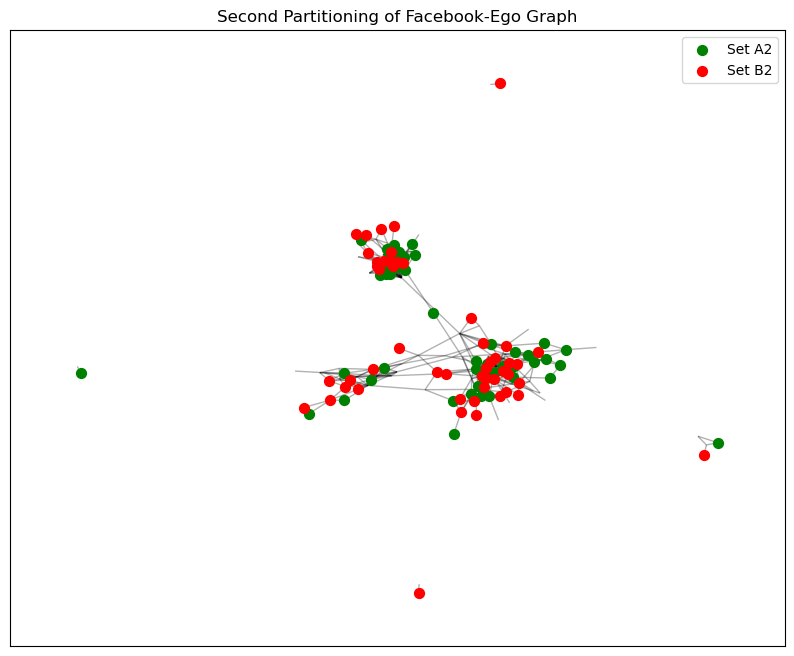

Comparison between the two partitions:
Difference in Cut Size: 18
Difference in Conductance: 0.06047724142017091


In [5]:
# Generate another set of 50 random nodes for each set
set_a2 = set(random.sample(all_nodes, 50))
set_b2 = set(random.sample([node for node in all_nodes if node not in set_a2], 50))

# Calculate cut size and conductance for the new sets
cut_size2, conductance2 = calculate_cut_conductance(facebook_graph, set_a2, set_b2)
print(f"Second Cut Size: {cut_size2}")
print(f"Second Conductance: {conductance2}")

# Plotting the second partition
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(facebook_graph, pos, nodelist=set_a2, node_color='green', label="Set A2", node_size=50)
nx.draw_networkx_nodes(facebook_graph, pos, nodelist=set_b2, node_color='red', label="Set B2", node_size=50)
nx.draw_networkx_edges(facebook_graph, pos, alpha=0.3)
plt.legend()
plt.title("Second Partitioning of Facebook-Ego Graph")
plt.show()

# Observing differences
print("Comparison between the two partitions:")
print(f"Difference in Cut Size: {abs(cut_size - cut_size2)}")
print(f"Difference in Conductance: {abs(conductance - conductance2)}")


Observations:

The differences in cut size and conductance between the two partitions may be caused by the degree and connectivity of nodes in each set. Sets with more connections between them will have a higher cut size, and conductance will vary based on how densely connected each partition is within itself relative to the connections between the sets.

### (c) Please output the Laplacian matrix of Facebook-Ego dataset.

In [6]:
# Calculate the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(facebook_graph).toarray()
print("Laplacian Matrix of Facebook-Ego Graph:\n", laplacian_matrix)


Laplacian Matrix of Facebook-Ego Graph:
 [[12 -1  0 ...  0  0  0]
 [-1 10  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


### (d) Please return the list of cliques over the entire Facebook-Ego dataset.

In [7]:
# List all cliques in the graph
cliques = list(nx.find_cliques(facebook_graph))
print(f"Number of cliques in the graph: {len(cliques)}")
print("Some cliques:", cliques[:5])  # Display the first five cliques


Number of cliques in the graph: 260
Some cliques: [[58, 107, 171], [2759, 2690], [2661, 2708, 2719], [2661, 2790], [2661, 2742, 2765, 2793, 2674]]
